Jacob Valdenegro Monzón A01640992

#Ejercicio 1

a.b)

**Mayor variabilidad**: Ausentismo

**Menor variabilidad**: Producción Generada

Estadisticas relevantes:

**Desviación estándar** ya que nos indica en relacion a su media que tan dispersas estan las variables, cuanto mayor es la desviación estándar, mayor es la dispersión de los datos y el **coeficiente de variacion** es útil para comparar la variabilidad entre variables con diferentes unidades o escalas, ya que normaliza la desviación estándar respecto a la media.

Resto de ejercicio 1 en Excel

#Ejercicio 2

In [13]:
resistances = [
    28.30, 26.80, 26.60, 26.50, 28.10, 24.80, 27.40, 26.20, 29.40, 28.60,
    24.90, 25.20, 30.40, 27.70, 27.00, 26.10, 28.10, 26.90, 28.00, 27.60,
    25.60, 29.50, 27.60, 27.30, 26.20, 27.70, 27.20, 25.90, 26.50, 28.30,
    26.50, 29.10, 23.70, 29.70, 26.80, 29.50, 28.40, 26.30, 28.10, 28.70,
    27.00, 25.50, 26.90, 27.20, 27.60, 25.50, 28.30, 27.40, 28.80, 25.00,
    25.30, 27.70, 25.20, 28.60, 27.90, 28.70
]

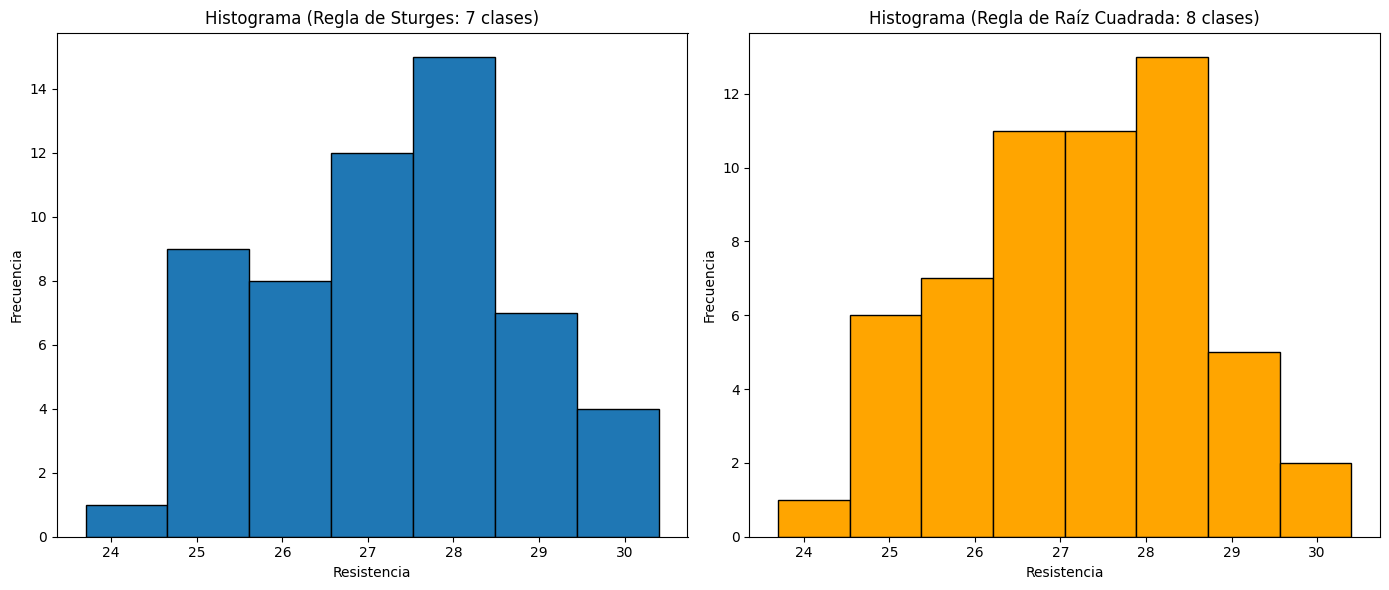

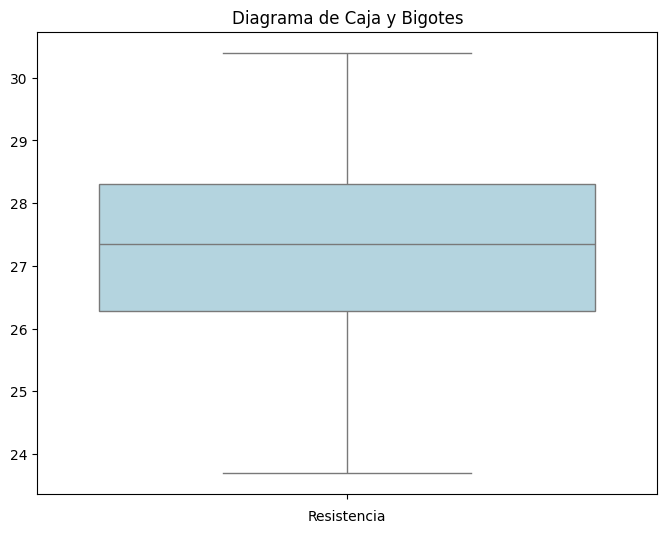

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Función para calcular la regla de Sturges (uno de los métodos comunes para determinar el número de clases)
sturges_rule = lambda data: int(np.ceil(np.log2(len(data)) + 1))

# Función para calcular la regla de la Raíz Cuadrada
sqrt_rule = lambda data: int(np.ceil(np.sqrt(len(data))))

# Determinar el número de clases utilizando diferentes reglas
bins_sturges = sturges_rule(resistances)
bins_sqrt = sqrt_rule(resistances)

# Crear histogramas para ambas reglas
plt.figure(figsize=(14, 6))

# Histograma utilizando la Regla de Sturges
plt.subplot(1, 2, 1)
plt.hist(resistances, bins=bins_sturges, edgecolor='black')
plt.title(f'Histograma (Regla de Sturges: {bins_sturges} clases)')
plt.xlabel('Resistencia')
plt.ylabel('Frecuencia')

# Histograma utilizando la Regla de la Raíz Cuadrada
plt.subplot(1, 2, 2)
plt.hist(resistances, bins=bins_sqrt, edgecolor='black', color='orange')
plt.title(f'Histograma (Regla de Raíz Cuadrada: {bins_sqrt} clases)')
plt.xlabel('Resistencia')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Crear un diagrama de caja y bigotes para analizar los valores atípicos
plt.figure(figsize=(8, 6))
sns.boxplot(y=resistances, color='lightblue')
plt.title('Diagrama de Caja y Bigotes')
plt.xlabel('Resistencia')
plt.show()


**a) ¿Qué tipo de variable se está midiendo? ¿Discreta o continua? Explique.**
Variable continua ya que se puede tomar cualquier valor.

**b) Haga un análisis exploratorio de estos datos.**

El de regla de Sturges muestra 7 clases, la mayoría de las resistencias están concentradas entre 25 y 29, con un ligero sesgo hacia la derecha, y el de la regla de la raíz cuadrada se muestra 8 clases, el comportamiento es similar.

En el diagrama de Caja y Bigotes los valores de resistencia están entre 25 y 29.

In [25]:
import scipy.stats as stats

# a) Estimación de la resistencia promedio con una confianza del 94%
confidence_level = 0.94
sample_mean = np.mean(resistances)
sample_std = np.std(resistances, ddof=1)  # Desviación estándar muestral
n = len(resistances)

# Intervalo de confianza para la media
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)  # Valor crítico de t para el intervalo
margin_of_error = t_critical * (sample_std / np.sqrt(n))
confidence_interval_mean = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# b) Prueba estadística para verificar si la resistencia promedio es 25 kg
hypothesized_mean = 25  # Valor propuesto en la hipótesis
t_statistic, p_value = stats.ttest_1samp(resistances, hypothesized_mean)

# c) Estimación de la desviación estándar poblacional con 98% de confianza
confidence_level_std = 0.98
alpha_std = 1 - confidence_level_std
chi2_lower = stats.chi2.ppf(alpha_std/2, df=n-1)
chi2_upper = stats.chi2.ppf(1 - alpha_std/2, df=n-1)

# Intervalo de confianza para la desviación estándar poblacional
std_lower = np.sqrt((n-1) * sample_std**2 / chi2_upper)
std_upper = np.sqrt((n-1) * sample_std**2 / chi2_lower)

# Results
print(f"Intervalo de confianza del 94% para la media de las resistencias: {confidence_interval_mean}")
print(f"t para la prueba de hipótesis (resistencia promedio = 25 kg): {t_statistic:.4f}")
print(f"Valor p para la prueba de hipótesis: {p_value:.4f}")
print(f"Intervalo de confianza del 98% para la desviación estándar poblacional: ({std_lower:.4f}, {std_upper:.4f})")


Intervalo de confianza del 94% para la media de las resistencias: (26.879344447464373, 27.613512695392767)
t para la prueba de hipótesis (resistencia promedio = 25 kg): 11.7521
Valor p para la prueba de hipótesis: 0.0000
Intervalo de confianza del 98% para la desviación estándar poblacional: (1.1694, 1.8309)


 La resistencia promedio de los envases no es de 25 kg ya que la prueba t muestra que la resistencia media es significativamente mayor.

#Ejercicio 3

In [29]:
import numpy as np
import scipy.stats as stats

# Datos proporcionados
mujeres = np.array([75, 77, 78, 79, 77, 73, 78, 79, 78, 80])
hombres = np.array([74, 72, 77, 76, 76, 73, 75, 73, 74, 75])

# Planteamiento de hipótesis:
# H0: La temperatura promedio confortable es igual para hombres y mujeres (µ_mujeres = µ_hombres)
# H1: La temperatura promedio confortable es diferente para hombres y mujeres (µ_mujeres ≠ µ_hombres)

t_statistic, p_value = stats.ttest_ind(mujeres, hombres)

print("Prueba t de dos muestras independientes:")
print(f"Estadístico t: {t_statistic}")
print(f"P-valor: {p_value}")


# Planteamiento de hipótesis:
# H0: Las varianzas de las temperaturas confortables son iguales para hombres y mujeres (σ²_mujeres = σ²_hombres)
# H1: Las varianzas de las temperaturas confortables son diferentes para hombres y mujeres (σ²_mujeres ≠ σ²_hombres)

stat_levene, p_value_levene = stats.levene(mujeres, hombres)

print("\nPrueba de Levene para igualdad de varianzas:")
print(f"Estadístico de Levene: {stat_levene}")
print(f"P-valor: {p_value_levene}")


Prueba t de dos muestras independientes:
Estadístico t: 3.5254179083580253
P-valor: 0.0024163922940833725

Prueba de Levene para igualdad de varianzas:
Estadístico de Levene: 0.032142857142857056
P-valor: 0.8597171607575279


a) ¿Las muestras son dependientes o independientes?

En este caso, las muestras son independientes ya que las mediciones de temperatura confortable para los hombres y mujeres no están emparejadas o relacionadas directamente, son dos grupos diferentes de personas.

b) ¿La temperatura promedio más confortable es igual para hombres que para mujeres?

Se debe realizar una prueba t de dos muestras independientes.

H0 : La temperatura promedio es igual para ambos grupos.

H1 : La temperatura promedio es diferente para ambos grupos.

Rechazamos la hipótesis nula (H0). La temperatura promedio confortable es significativamente diferente entre hombres y mujeres.


c) ¿Los datos poseen la misma variabilidad? ¿Qué tipo de prueba estadística se debe realizar?

Se debe realizar una prueba de igualdad de varianzas (prueba de Levene).

H0 : Las varianzas son iguales para ambos grupos.

H1 : Las varianzas son diferentes para ambos grupos.

No rechazamos la hipótesis nula (H0). No hay evidencia suficiente para decir que las varianzas son diferentes entre hombres y mujeres.



#Ejercicio 4

In [27]:
import numpy as np
from scipy.stats import ttest_rel


# Datos proporcionados
metodo_actual = np.array([
    1.88, 1.84, 1.83, 1.90, 2.19, 1.89, 2.27, 2.03, 1.96, 1.98, 2.00, 1.92,
    1.83, 1.94, 1.94, 1.95, 1.93, 2.01
])

metodo_nuevo = np.array([
    1.87, 1.90, 1.85, 1.88, 2.18, 1.87, 2.23, 1.97, 2.00, 1.98, 1.99, 1.89,
    1.78, 1.92, 2.02, 2.00, 1.95, 2.05
])

# Calcular la prueba t pareada
t_stat, p_value = ttest_rel(metodo_actual, metodo_nuevo)

t_stat, p_value

print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")



Estadístico t: -0.2387
Valor p: 0.8142


a) ¿Las muestras son dependientes o independientes?

Las muestras son dependientes porque las mediciones de ambos métodos (actual y nuevo) se realizaron en los mismos discos.

b) ¿Qué tipo de prueba estadística se debe realizar?

Prueba t

H0 : No hay diferencia en las densidades mínimas medidas por el método actual y el método nuevo.

H1 : Existe una diferencia en las densidades mínimas medidas por el método actual y el método nuevo.

El valor p es mucho mayor que el nivel de significancia típico de 0.05, esto sugiere que no hay evidencia suficiente para afirmar que existe una diferencia significativa en las densidades mínimas medidas por el método actual y el nuevo método.

c) ¿Recomienda la adopción del nuevo método?

Sí, recomendaría la adopción del nuevo método, aunque los resultados indican que no hay una diferencia significativa entre los métodos, el nuevo método podría reducir el tiempo de prueba considerablemente.